In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
csv = pd.read_csv("output_size.csv")
print(csv.shape)

(1566, 3)


In [3]:
# normalization
X = csv[['height', 'weight']].as_matrix()
print(X)
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
print(X_norm)

# one-hot encoding
size_class = dict(zip(['S', 'M', 'L', 'XL'], 
                      [[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]]))

y = np.empty((1566, 4))
for i,v in enumerate(csv['size']):
    y[i] = size_class[v]
print(y[0])

[[173  70]
 [178  65]
 [163  50]
 ...
 [173  73]
 [174  80]
 [179  75]]
[[0.56097561 0.46341463]
 [0.68292683 0.40243902]
 [0.31707317 0.2195122 ]
 ...
 [0.56097561 0.5       ]
 [0.58536585 0.58536585]
 [0.70731707 0.52439024]]
[0. 1. 0. 0.]


C:\Users\rlaxo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\rlaxo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# data split

X_train, y_train = X_norm[0:1000], y[0:1000]
X_test, y_test = X_norm[1000:], y[1000:]

In [10]:
# create model

model = tf.keras.Sequential()
model.add(layers.Dense(6, input_shape = (2,), kernel_initializer = 'he_normal'))
model.add(layers.Activation('relu'))


model.add(layers.Dense(5, kernel_initializer = 'he_normal'))
model.add(layers.Activation('relu'))

model.add(layers.Dense(5, kernel_initializer = 'he_normal'))
model.add(layers.Activation('relu'))

model.add(layers.Dense(4, kernel_initializer = 'he_normal'))
model.add(layers.Activation('softmax'))


rmsprop = tf.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss = 'categorical_crossentropy',
             optimizer = rmsprop,
             metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 18        
_________________________________________________________________
activation_4 (Activation)    (None, 6)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 35        
_________________________________________________________________
activation_5 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
activation_6 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                

In [11]:
hist = model.fit(X_train, y_train,
                batch_size = 20,
                epochs = 500,
                validation_split = 0.2,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10)],
                verbose = 1)

score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])


Train on 800 samples, validate on 200 samples
Epoch 1/500
800/800 [==============================] - 4s 5ms/sample - loss: 1.7524 - accuracy: 0.1750 - val_loss: 1.6746 - val_accuracy: 0.1250
Epoch 2/500
800/800 [==============================] - 0s 313us/sample - loss: 1.5651 - accuracy: 0.1538 - val_loss: 1.5218 - val_accuracy: 0.2350
Epoch 3/500
800/800 [==============================] - 0s 268us/sample - loss: 1.4659 - accuracy: 0.3200 - val_loss: 1.4346 - val_accuracy: 0.3050
Epoch 4/500
800/800 [==============================] - 0s 357us/sample - loss: 1.4019 - accuracy: 0.3275 - val_loss: 1.3745 - val_accuracy: 0.3000
Epoch 5/500
800/800 [==============================] - 0s 353us/sample - loss: 1.3566 - accuracy: 0.3262 - val_loss: 1.3314 - val_accuracy: 0.3050
Epoch 6/500
800/800 [==============================] - 0s 317us/sample - loss: 1.3230 - accuracy: 0.3300 - val_loss: 1.3042 - val_accuracy: 0.3050
Epoch 7/500
800/800 [==============================] - 0s 417us/sample - l

800/800 [==============================] - 0s 450us/sample - loss: 0.9376 - accuracy: 0.5738 - val_loss: 0.9429 - val_accuracy: 0.6150
Epoch 57/500
800/800 [==============================] - 0s 357us/sample - loss: 0.9352 - accuracy: 0.5713 - val_loss: 0.9501 - val_accuracy: 0.6150
Epoch 58/500
800/800 [==============================] - 0s 425us/sample - loss: 0.9358 - accuracy: 0.5725 - val_loss: 0.9441 - val_accuracy: 0.6100
Epoch 59/500
800/800 [==============================] - 0s 388us/sample - loss: 0.9361 - accuracy: 0.5825 - val_loss: 0.9422 - val_accuracy: 0.6200
Epoch 60/500
800/800 [==============================] - 0s 372us/sample - loss: 0.9366 - accuracy: 0.5725 - val_loss: 0.9427 - val_accuracy: 0.6150
Epoch 61/500
800/800 [==============================] - 0s 237us/sample - loss: 0.9348 - accuracy: 0.5675 - val_loss: 0.9437 - val_accuracy: 0.6150
Epoch 62/500
800/800 [==============================] - 0s 231us/sample - loss: 0.9360 - accuracy: 0.5700 - val_loss: 0.9438 

test_loss:  0.9920045011035123
test_acc:  0.56183743


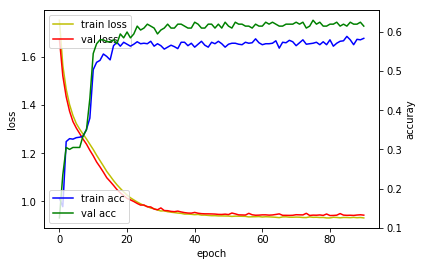

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [44]:
a = int(input("키: "))
b = int(input('몸무게: '))

X_new = [a, b]
X_new_norm = scaler.transform([X_new])

def predict_size(X):
    y_pred = model.predict_classes(X)
    y_pred_prob = model.predict_proba(X)
    proba = []
    
    for i in y_pred_prob:
        proba.extend(i)
    proba_dict = dict(zip(proba, ['S', 'M', 'L', 'XL']))
    sorting = sorted(proba_dict.items(), reverse=True)
    a = sorting[0][0] * 100
    b = sorting[1][0] * 100
    
    print("{}일 확률이 {:0.2f}%이고, \n{}일 확률이 {:0.2f}%입니다.".format(sorting[0][1], a, sorting[1][1], b))
    
    
predict_size(X_new_norm)

키: 160
몸무게: 45
S일 확률이 62.39%이고, 
M일 확률이 32.73%입니다.
